In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score


In [7]:
df = pd.read_csv("df.csv")
df_1 = pd.read_csv("df_1.csv")
df_1.head()

,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,98.0,52.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,195.0,...,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.0,24.0,0.0
1,100.0,100.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,150.0,...,9.0,9.0,10.0,9.0,10.0,9.0,0.0,0.0,1.0,0.0
2,97.0,100.0,0.0,0.0,6.0,1.0,2.0,3.0,0.0,140.0,...,8.0,8.0,9.0,9.0,9.0,9.0,0.0,0.0,3.0,1.0
3,92.0,100.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0,110.0,...,9.0,8.0,8.0,8.0,9.0,9.0,0.0,1.0,4.0,4.0
4,100.0,75.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,119.0,...,9.0,9.0,10.0,10.0,8.0,9.0,0.0,2.0,3.0,0.0


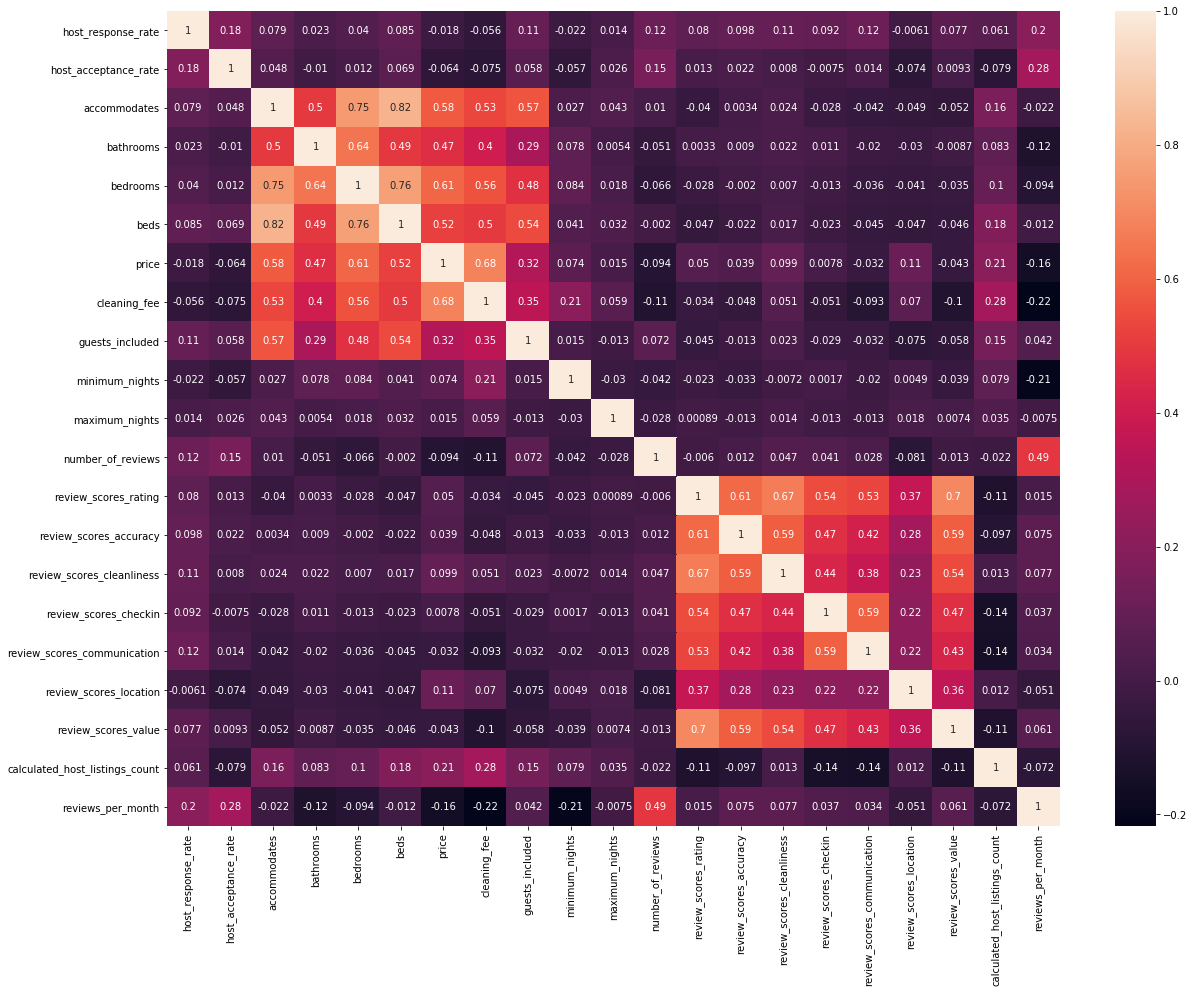

In [3]:
corrmat = df_1[df._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [65]:
def num_logarithm(df):
    for col_names in list(df.columns):
        df[col_names] = df[col_names].apply(lambda y: np.log(y) if y > 0 else y)
    return df

df_norm = df_1[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
              'review_scores_communication', 'review_scores_location', 'review_scores_value']].copy()

#df_norm[df._get_numeric_data().columns] = num_logarithm(df_1[df._get_numeric_data().columns])

In [30]:
df_norm.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,90.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0
1,90.0,9.0,9.0,10.0,9.0,10.0,9.0,0.0
2,83.0,8.0,8.0,9.0,9.0,9.0,9.0,1.0
3,84.0,9.0,8.0,8.0,8.0,9.0,9.0,4.0
4,90.0,9.0,9.0,10.0,10.0,8.0,9.0,0.0


In [31]:
df_norm.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,93.766180,9.563680,9.340646,9.731862,9.776922,9.423719,9.356223,1.594258
std,6.113370,0.606897,0.844721,0.513768,0.437047,0.729485,0.659533,1.622251
min,69.000000,7.000000,6.000000,7.000000,8.000000,7.000000,7.000000,0.000000
25%,91.933333,9.000000,9.000000,9.700000,9.766667,9.000000,9.000000,0.833333
50%,95.000000,10.000000,9.566667,10.000000,10.000000,9.633333,9.366667,1.000000
75%,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


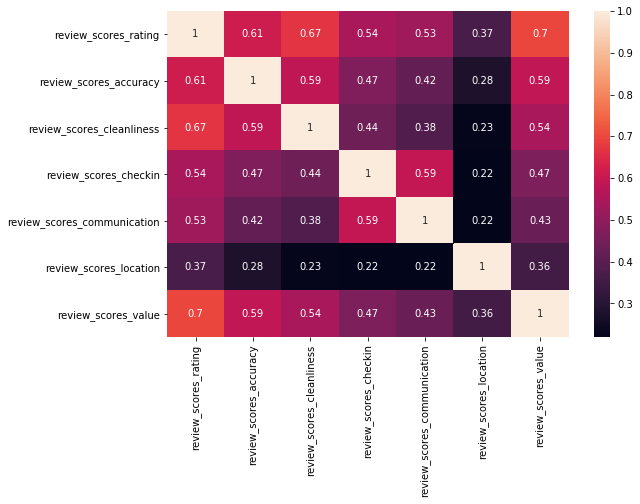

In [98]:
corrmat = df_norm.corr().round(7)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, annot=True)
plt.show()

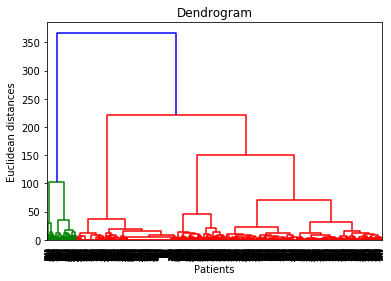

In [66]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()

In [82]:
full_agglomerative_4 = df_1[['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'cleaning_fee',
       'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']].copy()
full_agglomerative_4['cluster'] = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df_norm)

In [83]:
full_agglomerative_4.groupby('cluster').aggregate('mean')


,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
cluster,,,,,,,,,,,,,,,
0,3.422642,1.290818,1.355220,1.758491,126.392453,58.423145,11.600000,78.720755,8.645283,7.932075,9.000000,9.166038,8.777358,8.267925,1.347170
1,3.327182,1.262006,1.331535,1.672581,161.325053,60.754247,18.386799,94.526331,9.625574,9.428744,9.797800,9.835131,9.448829,9.380648,1.663023
2,2.994438,1.260104,1.260326,1.537671,136.056730,53.396589,11.619577,99.431961,9.898776,9.836522,9.959585,9.962514,9.725918,9.831554,1.528105
3,3.043182,1.220303,1.270909,1.584470,126.677273,55.659924,16.718182,88.817197,9.233939,8.893712,9.496212,9.579242,9.115152,8.962273,1.658030


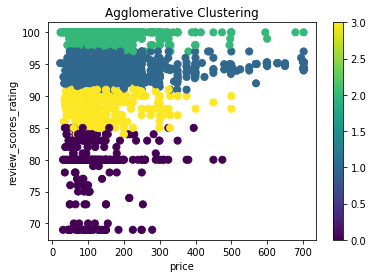

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(full_agglomerative_4['price'],full_agglomerative_4['review_scores_rating'],
                     c=full_agglomerative_4['cluster'],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('price')
ax.set_ylabel('review_scores_rating')
plt.colorbar(scatter)

In [88]:
full_agglomerative_5 = df_1[['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'cleaning_fee',
       'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']].copy()
full_agglomerative_5['cluster'] = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df_norm)

In [89]:
full_agglomerative_5.groupby('cluster').aggregate('mean')


,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
cluster,,,,,,,,,,,,,,,
0,3.327182,1.262006,1.331535,1.672581,161.325053,60.754247,18.386799,94.526331,9.625574,9.428744,9.797800,9.835131,9.448829,9.380648,1.663023
1,3.043182,1.220303,1.270909,1.584470,126.677273,55.659924,16.718182,88.817197,9.233939,8.893712,9.496212,9.579242,9.115152,8.962273,1.658030
2,2.994438,1.260104,1.260326,1.537671,136.056730,53.396589,11.619577,99.431961,9.898776,9.836522,9.959585,9.962514,9.725918,9.831554,1.528105
3,3.457711,1.308789,1.353897,1.776119,131.243781,57.736318,13.641791,81.189055,8.815920,8.228856,9.124378,9.268657,8.890547,8.482587,1.452736
4,3.312500,1.234375,1.359375,1.703125,111.156250,60.580208,5.187500,70.968750,8.109375,7.000000,8.609375,8.843750,8.421875,7.593750,1.015625


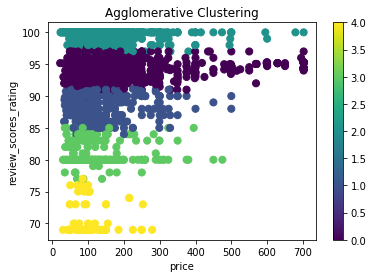

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(full_agglomerative_5['price'],full_agglomerative_5['review_scores_rating'],
                     c=full_agglomerative_5['cluster'],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('price')
ax.set_ylabel('review_scores_rating')
plt.colorbar(scatter)

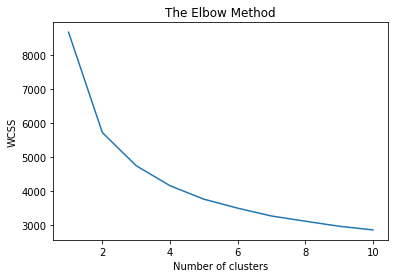

In [58]:
def elbow(df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
elbow(df_norm)

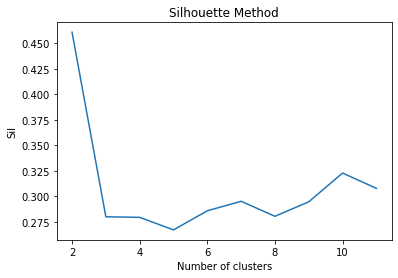

2:0.46066794049245285
3:0.2801398955515021
4:0.27960577331796654
5:0.2672966640529808
6:0.28602855289839846
7:0.2953060259117121
8:0.28061122874207084
9:0.2948105613686107
10:0.3229207887984644
11:0.30797738927764134


In [59]:
def silhouette(df):
    sil = []

    for k in range(2, 12):
        kmeans = KMeans(n_clusters = k).fit(df)  
        preds = kmeans.fit_predict(df)
        sil.append(silhouette_score(df, preds, metric = 'euclidean'))


    plt.plot(range(2, 12), sil)
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sil')
    plt.show()

    for i in range(len(sil)):
        print(str(i+2) +":"+ str(sil[i]))

silhouette(df_norm)

In [92]:
full_km_4 = df_1[['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'cleaning_fee',
       'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']].copy()
full_km_4['cluster'] = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df_norm)
full_kms = KMeans(n_clusters = 4, random_state = 0).fit(df_norm)
pd.DataFrame(full_kms.cluster_centers_, columns = df_norm.columns)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,94.300383,9.607705,9.413689,9.791120,9.824426,9.458033,9.362705
1,77.873913,8.608696,7.878261,9.000000,9.169565,8.773913,8.239130
2,99.080600,9.886825,9.806193,9.950964,9.959558,9.663855,9.790079
3,88.641732,9.219226,8.860499,9.465879,9.558530,9.136811,8.945407


In [93]:
full_km_4.groupby('cluster').aggregate('mean')

,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
cluster,,,,,,,,,,,,,,,
0,3.373563,1.270060,1.348714,1.694308,165.490969,61.944198,17.701149,94.296442,9.607417,9.413547,9.791024,9.824384,9.457745,9.362370,1.620525
1,3.378261,1.282899,1.347826,1.739130,126.304348,58.109710,9.143478,77.873913,8.608696,7.878261,9.000000,9.169565,8.773913,8.239130,1.191304
2,2.992431,1.252665,1.255850,1.532986,135.680227,53.127468,13.459792,99.076096,9.886629,9.805613,9.950773,9.959350,9.663797,9.789656,1.584989
3,3.104331,1.228215,1.274278,1.610564,127.602362,56.318438,17.505906,88.641732,9.219226,8.860499,9.465879,9.558530,9.136811,8.945407,1.733005


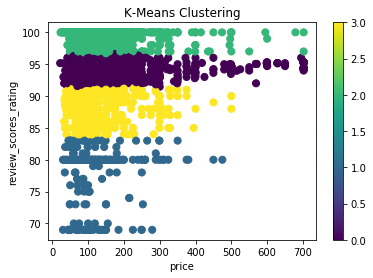

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(full_km_4['price'],full_km_4['review_scores_rating'],
                     c=full_km_4['cluster'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('price')
ax.set_ylabel('review_scores_rating')
plt.colorbar(scatter)

In [95]:
adjusted_rand_score(full_km_4.cluster, full_agglomerative_4.cluster)

0.7859077342617662

In [103]:
full_km_5 = df_1[['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'cleaning_fee',
       'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']].copy()
full_km_5['cluster'] = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(df_norm)
full_kms = KMeans(n_clusters = 5, random_state = 0).fit(df_norm)
pd.DataFrame(full_kms.cluster_centers_, columns = df_norm.columns)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,99.080600,9.886825,9.806193,9.950964,9.959558,9.663855,9.790079
1,81.621739,8.860870,8.234783,9.165217,9.317391,8.947826,8.521739
2,89.291121,9.244760,8.936608,9.504221,9.587555,9.150364,8.993959
3,70.873016,8.126984,6.984127,8.619048,8.857143,8.412698,7.603175
4,94.328197,9.611157,9.420768,9.792792,9.824717,9.461005,9.364982


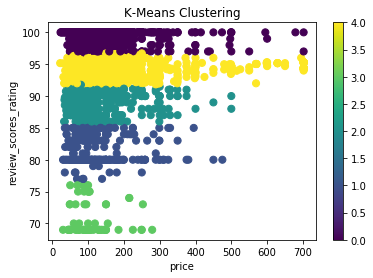

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(full_km_5['price'],full_km_5['review_scores_rating'],
                     c=full_km_5['cluster'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('price')
ax.set_ylabel('review_scores_rating')
plt.colorbar(scatter)

In [105]:
adjusted_rand_score(full_km_5.cluster, full_agglomerative_5.cluster)

0.781449387684666